In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_context("paper")
sns.set(font_scale = 1.6)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

In [2]:
from matplotlib import colors
cmap = colors.ListedColormap(['#264653', '#2A9D8F','#E9C46A', '#F4A261', '#E76F51'])

### Before normalization 

In [7]:
dir_path = '/mlodata1/lugeon/dream_data/processed/healthy/freq'

subjects = []

for file in glob.glob(f'{dir_path}/*'):
    with np.load(file) as f:
        trials = []
        for trial in f:
            signal = f[trial]
            if signal.shape != (237, 256, 5):
                print(trial)
            else:
                trials.append(signal)
            
        subjects.append(np.stack(trials))

In [ ]:
subjects[0].shape

(14, 237, 256, 5)

In [ ]:
# means over trials and frames
means = [s.mean(axis=(0, 1)) for s in subjects]
means[0].shape

(256, 5)

In [ ]:
snames = [s.split('/')[-1].split('.')[0] for s in glob.glob(f'{dir_path}/*')]
snames

['H009',
 'H018',
 'H019',
 'H021',
 'H025',
 'H026',
 'H033',
 'H035',
 'H048',
 'H050',
 'H051',
 'H054',
 'H055',
 'H057',
 'H060',
 'H089',
 'H099',
 'H100',
 'H061',
 'H068']

In [4]:
# average power over all electrode, per subject
low_freq_mean = [m[:, 0].mean() for m in means]

fig, ax = plt.subplots(figsize=(10, 5))

sort_ix = np.argsort(low_freq_mean)[::-1]
y = np.array(low_freq_mean)[sort_ix]
x = np.arange(len(low_freq_mean))

plt.bar(x, y, color=cmap(0), alpha=0.5)

ax.set_xticks(x)
ax.set_xticklabels(np.array(snames)[sort_ix], rotation=45, ha='right')

plt.ylabel('Average power')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('img/power_per_subject.pdf', bbox_inches='tight')

plt.show()

NameError: name 'means' is not defined

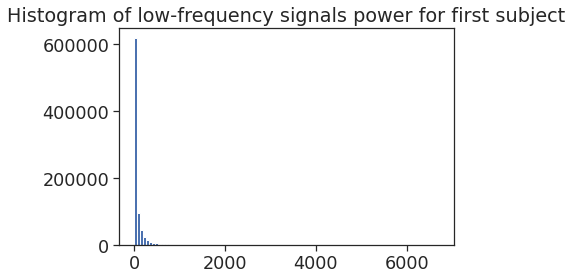

In [ ]:
plt.hist(subjects[0][:, :, :, 0].flatten(), bins=100)
plt.title('Histogram of low-frequency signals power for first subject')
plt.show()

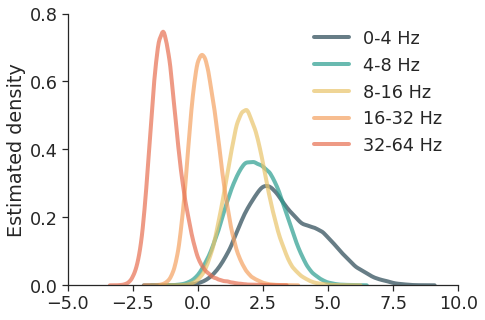

In [5]:
subject = 0
signal = subjects[subject]

bandwidths = ['0-4 Hz', '4-8 Hz', '8-16 Hz', '16-32 Hz', '32-64 Hz']

fig, ax = plt.subplots(figsize=(7, 5))

for bw in range(signal.shape[3]):
    f = np.log(signal[:, :, :, bw].flatten())

    sns.kdeplot(f, ax=ax, linewidth=4, color=cmap(bw), alpha=0.7, label=bandwidths[bw])
    
    
plt.legend(frameon=False)

plt.ylabel('Estimated density')

plt.ylim(0, 0.8)
plt.xlim(-5, 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('img/frequency_density.pdf', bbox_inches='tight')

plt.show()

In [6]:
# Standard deviation over trials -- high variance across trials for a same subject!
for i, s in enumerate(subjects):
    mean = s[:, :, :, 0].mean(axis=(1, 2)).mean()
    std = s[:, :, :, 0].mean(axis=(1, 2)).std()
    sname = snames[i]
    print(f'{sname}: mean = {mean:<6.2f}, std = {std:<6.2f}')

NameError: name 'snames' is not defined

### After normalization 

In [ ]:
dir_path = '/mlodata1/lugeon/dream_data/processed/healthy/norm'

subjects = []

for file in glob.glob(f'{dir_path}/*'):
    with np.load(file) as f:
        trials = []
        for trial in f:
            signal = f[trial]
            if signal.shape != (237, 256, 5):
                print(trial)
            else:
                trials.append(signal)
            
        subjects.append(np.stack(trials))

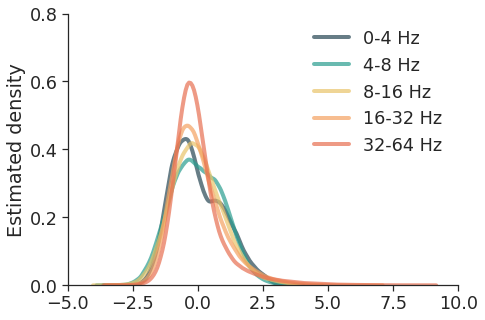

In [ ]:
subject = 1
signal = subjects[subject]

bandwidths = ['0-4 Hz', '4-8 Hz', '8-16 Hz', '16-32 Hz', '32-64 Hz']

fig, ax = plt.subplots(figsize=(7, 5))

for bw in range(signal.shape[3]):
    f = signal[:, :, :, bw].flatten()

    sns.kdeplot(f, ax=ax, linewidth=4, color=cmap(bw), alpha=0.7, label=bandwidths[bw])
    
    
plt.legend(frameon=False)

plt.ylabel('Estimated density')

plt.ylim(0, 0.8)
plt.xlim(-5, 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.savefig('img/frequency_density.pdf', bbox_inches='tight')

plt.show()